In [1]:
from my_demo_fn import main
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

/home/nripstein/miniconda3/envs/shan_et_al2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# def plot_colored_horizontal_lines(col_dict1, col_dict2):
#     """
#     Plot two colored horizontal lines with labels to the left of them.

#     :param col_dict1: Dictionary for the first line with keys as the end index of the color and values as the colors
#     :param col_dict2: Dictionary for the second line with keys as the end index of the color and values as the colors
#     :param line_height: Height of the lines
#     :param label_offset: Offset to control the distance between lines and labels

#     Example:
#         col_dict1 = {15: 'blue', 20: 'red', 200: 'pink'}
#         col_dict2 = {10: 'green', 30: 'purple', 90: 'orange', 120: "green"}
#         plot_colored_horizontal_lines(col_dict1, col_dict2)
#     """
#     line_width = 10
#     line_height=1
#     label_offset=0.5
#     # Create a figure and a set of subplots
#     fig, ax = plt.subplots(figsize=(line_width, line_height))

#     # Initial start position for the first line
#     start1 = 0
#     for end, color in sorted(col_dict1.items()):
#         ax.plot([start1, end], [0, 0], color=color, lw=line_width, solid_capstyle='butt')
#         start1 = end

#     # Initial start position for the second line
#     start2 = 0
#     for end, color in sorted(col_dict2.items()):
#         print(color)
#         ax.plot([start2, end], [-line_height, -line_height], color=color, lw=line_width, solid_capstyle='butt')
#         start2 = end

#     # Set the limits for the x-axis and y-axis
#     max_x = max(max(col_dict1.keys()), max(col_dict2.keys()))
#     ax.set_xlim(0, max_x)
#     ax.set_ylim(-2 * line_height, line_height)

#     # Remove the y-axis
#     ax.yaxis.set_visible(False)

#     # Remove the spines of the plot
#     for spine in ax.spines.values():
#         spine.set_visible(False)

#     # Add labels to the left of the lines with appropriate offset
#     ax.text(-label_offset, 0, "Pred:", va='center', ha='right', fontsize=12, color='black')
#     ax.text(-label_offset, -line_height, "GT:", va='center', ha='right', fontsize=12, color='black')

#     # Show the plot
#     plt.tight_layout()
#     plt.show()

def get_last_indices_of_consecutive_labels(df):
    last_indices = {}
    last_label = None

    for index, row in df.iterrows():
        current_label = row['contact_label']
        # If the current label is different from the last one, update the dictionary
        if current_label != last_label:
            if last_label is not None:  # to skip the very first label
                last_indices[last_index] = last_label
            last_label = current_label
        last_index = index  # keep track of the last index
    
    # Add the last label and index after the loop
    last_indices[last_index] = current_label

    return last_indices


def plot_colored_horizontal_lines(col_dict1, col_dict2, line_height=1, label_offset=0.5, x_ticks_interval=None):
    """
    Plot two colored horizontal lines with labels to the left of them.

    :param col_dict1: Dictionary for the first line with keys as the end index of the color and values as the colors
    :param col_dict2: Dictionary for the second line with keys as the end index of the color and values as the colors
    :param line_height: Height of the lines
    :param label_offset: Offset to control the distance between lines and labels
    :param x_ticks_interval: Interval for x-axis ticks (set to None for automatic ticks)

    Example:
        col_dict1 = {15: 'blue', 20: 'red', 200: 'pink'}
        col_dict2 = {10: 'green', 30: 'purple', 90: 'orange', 120: "green"}
        plot_colored_horizontal_lines(col_dict1, col_dict2, line_height=1, label_offset=0.5, x_ticks_interval=50)
    """
    line_width = 10

    # Calculate figure height based on line_height and x_ticks_interval
    figure_height = line_height * 1.25 if x_ticks_interval else line_height

    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(line_width, figure_height))

    # Initial start position for the first line
    start1 = 0
    for end, color in sorted(col_dict1.items()):
        ax.plot([start1, end], [0, 0], color=color, lw=line_width, solid_capstyle='butt')
        start1 = end

    # Initial start position for the second line
    start2 = 0
    for end, color in sorted(col_dict2.items()):
        ax.plot([start2, end], [-line_height, -line_height], color=color, lw=line_width, solid_capstyle='butt')
        start2 = end

    # Set the limits for the x-axis and y-axis
    max_x = max(max(col_dict1.keys()), max(col_dict2.keys()))
    ax.set_xlim(0, max_x)
    ax.set_ylim(-2 * line_height, line_height)

    # Remove the y-axis
    ax.yaxis.set_visible(False)

    # Remove the spines of the plot
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Add labels to the left of the lines with appropriate offset
    ax.text(-label_offset, 0, "Pred:", va='center', ha='right', fontsize=12, color='black')
    ax.text(-label_offset, -line_height, "GT:", va='center', ha='right', fontsize=12, color='black')

    # Set x-axis ticks every x_ticks_interval units if specified
    if x_ticks_interval is not None:
        ax.set_xticks(range(0, int(max_x) + 1, x_ticks_interval))
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis ticks by 45 degrees

    # Show the plot
    plt.tight_layout()
    plt.show()


def plot_colored_horizontal_lines2(col_dict1, col_dict2, line_height=1, label_offset=0.5, x_ticks_interval=None):
    """
    Plot two colored horizontal lines with labels to the left of them.

    :param col_dict1: Dictionary for the first line with keys as the end index of the color and values as the colors
    :param col_dict2: Dictionary for the second line with keys as the end index of the color and values as the colors
    :param line_height: Height of the lines
    :param label_offset: Offset to control the distance between lines and labels
    :param x_ticks_interval: Interval for x-axis ticks (set to None for automatic ticks)

    Example:
        col_dict1 = {15: 'blue', 20: 'red', 200: 'pink'}
        col_dict2 = {10: 'green', 30: 'purple', 90: 'orange', 120: "green"}
        plot_colored_horizontal_lines(col_dict1, col_dict2, line_height=1, label_offset=0.5, x_ticks_interval=50)
    """
    line_width = 10

    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(line_width, line_height))

    # Initial start position for the first line
    start1 = 0
    for end, color in sorted(col_dict1.items()):
        ax.plot([start1, end], [0, 0], color=color, lw=line_width, solid_capstyle='butt')
        start1 = end

    # Initial start position for the second line
    start2 = 0
    for end, color in sorted(col_dict2.items()):
        ax.plot([start2, end], [-line_height, -line_height], color=color, lw=line_width, solid_capstyle='butt')
        start2 = end

    # Set the limits for the x-axis and y-axis
    max_x = max(max(col_dict1.keys()), max(col_dict2.keys()))
    ax.set_xlim(0, max_x)
    ax.set_ylim(-2 * line_height, line_height)

    # Remove the y-axis
    ax.yaxis.set_visible(False)

    # Remove the spines of the plot
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Add labels to the left of the lines with appropriate offset
    ax.text(-label_offset, 0, "Pred:", va='center', ha='right', fontsize=12, color='black')
    ax.text(-label_offset, -line_height, "GT:", va='center', ha='right', fontsize=12, color='black')

    # Set x-axis ticks every x_ticks_interval units if specified
    if x_ticks_interval is not None:
        ax.set_xticks(range(0, int(max_x) + 1, x_ticks_interval))
        ax.tick_params(axis='x', rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

from typing import List, Tuple
def comparison_dicts(gt_transitions: List[tuple], max_len) -> Tuple[dict]:
    """
    Args:
        gt_transitions: List of tuples of ground truth transition frames in form [(start1, end1), (start2, end2) ...]
    """

    def transition_to_dict(trns: List[Tuple[int, int]]) -> dict:
        output_dict = {}
        for bound in trns:
            output_dict[bound[0]] = "red"
            output_dict[bound[1]] = "green"
        return output_dict
    
    trans_dict_gt = transition_to_dict(gt_transitions)
    trans_dict_gt[max_len] = "red"  # need to make remaining frames without contact red
    return trans_dict_gt


def get_last_indices_of_consecutive_labels2(df, transformation_dict):
    last_indices = {}
    last_label = None

    for index, row in df.iterrows():
        current_label = row['contact_label_pred']
        # If the current label is different from the last one, update the dictionary
        if current_label != last_label:
            if last_label is not None:  # to skip the very first label
                # Transform the label using the transformation_dict
                transformed_label = transformation_dict.get(last_label, last_label)
                last_indices[last_index] = transformed_label
            last_label = current_label
        last_index = index  # keep track of the last index
    
    # Add the last label and index after the loop
    # Transform the label using the transformation_dict
    transformed_label = transformation_dict.get(current_label, current_label)
    last_indices[last_index] = transformed_label

    return last_indices

def condense_dataframe(df):
    """
    deals with duplicate images which have multiple contact states
    
    Condenses a pandas DataFrame by ensuring each 'image' entry is unique and retains
    the most relevant 'contact_label_pred' based on a set priority.

    The function operates under the rule that if multiple entries exist for the same 'image',
    it prioritizes keeping the entry with 'contact_label_pred' as "Portable Object Contact" over
    "Stationary Object Contact", and "Stationary Object Contact" over "No Contact". This is
    done by sorting the DataFrame according to the 'image' and a custom priority assigned to
    'contact_label_pred', then removing duplicate 'image' entries while keeping the entry with the
    highest-priority 'contact_label_pred'.
    """
    # Define a custom order for 'contact_label_pred'
    priority = {
        "Portable Object Contact": 1,
        "Stationary Object Contact": 2,
        "No Contact": 3
    }

    # Sort the DataFrame based on 'image' and the custom priority of 'contact_label_pred'
    df['priority'] = df['contact_label_pred'].map(priority)
    df = df.sort_values(by=['image', 'priority'])

    # Drop the 'priority' column as it's no longer needed after sorting
    df.drop('priority', axis=1, inplace=True)

    # Remove duplicates, keeping the first occurrence
    df = df.drop_duplicates(subset='image', keep='first')

    return df.iloc[df['image'].map(lambda x: int(x.split('_')[0])).argsort()].reset_index(drop=True)

In [3]:
sr2_pred = main(save_imgs=False, img_dir='/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr2/sr2_shrunk')

Processing Images: 100%|██████████| 4278/4278 [03:15<00:00, 21.83it/s]


In [4]:
# sr2_pred = sr2_pred.iloc[sr2_pred['image'].map(lambda x: int(x.split('_')[0])).argsort()].reset_index(drop=True)
sr2_pred_cond = condense_dataframe(sr2_pred)

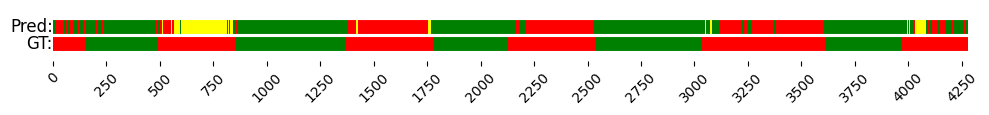

In [5]:
transformation_dict = {"Portable Object Contact": "green", "Portable Object": "green", "Stationary Object Contact": "red", "No Contact": "yellow", "Self Contact": "red"}
sr2_pred_dict = get_last_indices_of_consecutive_labels2(sr2_pred_cond, transformation_dict)

sr2_gt = [(156, 491), (850, 1364), (1775, 2127), (2537, 3036), (3612, 3972)]
gt_dict = comparison_dicts(sr2_gt, max_len=len(sr2_pred_cond))

plot_colored_horizontal_lines(sr2_pred_dict, gt_dict, x_ticks_interval=250)


In [3]:
sv2_results = main(save_imgs=False, img_dir='/home/nripstein/Documents/thesis data/thesis labels/sv labels/sv2_frames/sv2_shrunk', blue_refine=False)

Processing Images: 100%|██████████| 3851/3851 [02:55<00:00, 21.88it/s]


In [4]:
sv2_results_cond = condense_dataframe(sv2_results)

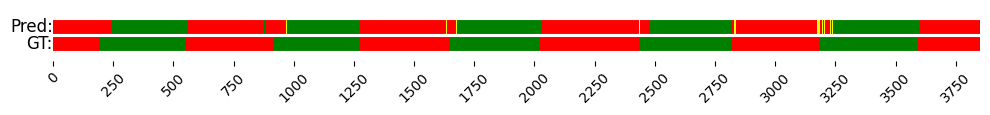

In [6]:
transformation_dict = {"Portable Object Contact": "green", "Portable Object": "green", "Stationary Object Contact": "red", "No Contact": "yellow", "Self Contact": "red"}
sr2_pred_dict = get_last_indices_of_consecutive_labels2(sv2_results_cond, transformation_dict)

sv2_gt = [(194, 554), (912, 1270), (1643, 2023), (2434, 2816), (3187, 3591)]
gt_dict = comparison_dicts(sv2_gt, len(sv2_results_cond))

plot_colored_horizontal_lines(sr2_pred_dict, gt_dict, x_ticks_interval=250)

In [23]:
gt_dict = comparison_dicts(sv2_gt, len(sv2_results_cond))
gt_dict

{194: 'red',
 554: 'green',
 912: 'red',
 1270: 'green',
 1643: 'red',
 2023: 'green',
 2434: 'red',
 2816: 'green',
 3187: 'red',
 3591: 'green',
 3851: 'red'}

Processing Images: 100%|██████████| 3851/3851 [02:56<00:00, 21.88it/s]


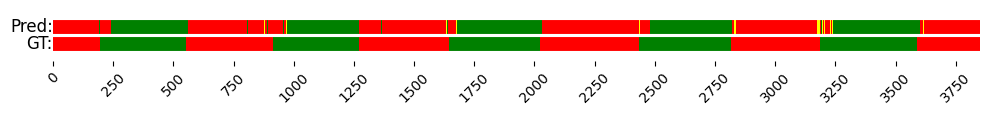

In [8]:
sv2_results = main(save_imgs=False, img_dir='/home/nripstein/Documents/thesis data/thesis labels/sv labels/sv2_frames/sv2_shrunk', blue_refine=True)
sv2_results_cond = condense_dataframe(sv2_results)
sr2_pred_dict = get_last_indices_of_consecutive_labels2(sv2_results_cond, transformation_dict)

sv2_gt = [(194, 554), (912, 1270), (1643, 2023), (2434, 2816), (3187, 3591)]
gt_dict = comparison_dicts(sv2_gt, len(sv2_results_cond))

plot_colored_horizontal_lines(sr2_pred_dict, gt_dict, x_ticks_interval=250)

# try blue refine. Should decrease false positives

In [22]:
sv2_results_cond.to_csv("/home/nripstein/Documents/thesis data/thesis labels/sv labels/sv2_frames/sv2_pred.csv", index=False)

In [14]:
import csv

def csv_to_tuples(filename):
    data = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip header row if it exists
        for row in reader:
            # Skip the first column and convert the rest to integers
            holding_transitions, not_holding_transitions = map(int, row[1:])
            data.append((holding_transitions, not_holding_transitions))
    return data

# Example usage:
filename = '/home/nripstein/Documents/thesis data/thesis labels/sv labels/sv2_frames/changepoints.csv'
result = csv_to_tuples(filename)
print(result)

[(194, 554), (912, 1270), (1643, 2023), (2434, 2816), (3187, 3591)]


# sv1:

In [13]:
sv1_dir = "/home/nripstein/Documents/thesis data/thesis labels/sv labels/sv1_frames/"

sv1_results = main(save_imgs=False, img_dir=sv1_dir + 'sv1_shrunk', blue_refine=True)
sv1_results_cond = condense_dataframe(sv1_results)
sv1_pred_dict = get_last_indices_of_consecutive_labels2(sv1_results_cond, transformation_dict)

Processing Images: 100%|██████████| 15244/15244 [11:28<00:00, 22.15it/s]


NameError: name 'csv_to_tuples' is not defined

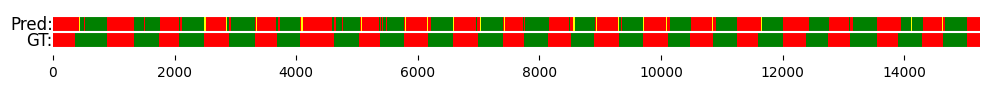

In [18]:


sv1_gt = csv_to_tuples(sv1_dir + "changepoints.csv")
gt_dict = comparison_dicts(sv1_gt, len(sv1_results_cond))

plot_colored_horizontal_lines(sv1_pred_dict, gt_dict)

# Functionize all

In [ ]:
transformation_dict = {"Portable Object Contact": "green", "Portable Object": "green", "Stationary Object Contact": "red", "No Contact": "yellow", "Self Contact": "red"}

def pred(dir: str, shrunk_add: str):
    if dir[-1] != "/":
        raise ValueError("NOAH! DIR NEEDS TO END IN /")

    raw_preds = main(save_imgs=False, img_dir=dir + shrunk_add, blue_refine=True)
    preds_cond = condense_dataframe(raw_preds)
    sv1_pred_dict = get_last_indices_of_consecutive_labels2(preds_cond, transformation_dict)


    sv1_gt = csv_to_tuples(sv1_dir + "changepoints.csv")
    gt_dict = comparison_dicts(sv1_gt, len(preds_cond))

    plot_colored_horizontal_lines(sv1_pred_dict, gt_dict)

# test on sr1

[autoreload of model.roi_layers.roi_align failed: Traceback (most recent call last):
  File "/home/nripstein/miniconda3/envs/shan_et_al2/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/home/nripstein/miniconda3/envs/shan_et_al2/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "/home/nripstein/miniconda3/envs/shan_et_al2/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/home/nripstein/miniconda3/envs/shan_et_al2/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 345, in update_class
    if update_generic(old_obj, new_obj):
  File "/home/nripstein/miniconda3/envs/shan_et_al2/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/home/nripstein/miniconda3/envs/shan_et_al2/lib/p

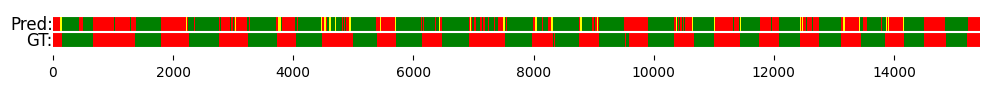

In [19]:
sv1_dir = "/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr1/"

sr1_results = main(save_imgs=False, img_dir=sv1_dir + 'sr1_shrunk', blue_refine=True)
sr1_results_cond = condense_dataframe(sr1_results)
sr1_pred_dict = get_last_indices_of_consecutive_labels2(sr1_results_cond, transformation_dict)

sv1_gt = csv_to_tuples(sv1_dir + "changepoints.csv")
gt_dict = comparison_dicts(sv1_gt, len(sr1_results_cond))

plot_colored_horizontal_lines(sr1_pred_dict, gt_dict)

Processing Images: 100%|██████████| 15432/15432 [19:23<00:00, 13.27it/s]


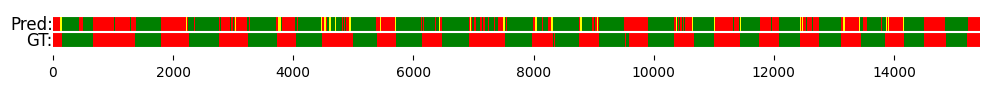

In [20]:
sv1_dir = "/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr1/"

sr1_results = main(save_imgs=True, img_dir=sv1_dir + 'sr1_shrunk', blue_refine=True)
sr1_results_cond = condense_dataframe(sr1_results)
sr1_pred_dict = get_last_indices_of_consecutive_labels2(sr1_results_cond, transformation_dict)

sv1_gt = csv_to_tuples(sv1_dir + "changepoints.csv")
gt_dict = comparison_dicts(sv1_gt, len(sr1_results_cond))

plot_colored_horizontal_lines(sr1_pred_dict, gt_dict)